# Lambda School Data Science Module 122
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [2]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=46.78852556683642, pvalue=6.918321895119782e-11)


In [3]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Degrees of Freedom

In [17]:
coinflips = [0,1,0,1,0,1,1,0,0]
coinflips = np.array(coinflips)
print(np.mean(coinflips))

# sample std
print(np.std(coinflips, ddof=1))

# population std 
np.std(coinflips, ddof=0)

0.4444444444444444
0.5270462766947299


0.4969039949999533

In [16]:
mean_age = 31
n=7
x= 32

sample = [28, 17, 25, 41, 42, 32, x]
sum(sample) / n

31.0

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



No matter the distribution of the underlying data, sample means are always distributed normally. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.5833333333333334, 0.4166666666666667, 0.75, 0.5, 0.4166666666666667, 0.4166666666666667, 0.16666666666666666, 0.3333333333333333, 0.5, 0.4166666666666667, 0.75, 0.5833333333333334, 0.5, 0.5, 0.5, 0.5, 0.4166666666666667, 0.5, 0.5833333333333334, 0.5, 0.5, 0.3333333333333333, 0.6666666666666666, 0.75, 0.4166666666666667, 0.5833333333333334, 0.5, 0.4166666666666667, 0.3333333333333333, 0.5, 0.3333333333333333, 0.25, 0.5, 0.4166666666666667, 0.6666666666666666, 0.6666666666666666, 0.5, 0.6666666666666666, 0.4166666666666667, 0.5, 0.5833333333333334, 0.5, 0.5833333333333334, 0.5, 0.25, 0.3333333333333333, 0.5833333333333334, 0.5833333333333334, 0.75, 0.3333333333333333, 0.6666666666666666, 0.5, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.25, 0.4166666666666667, 0.5, 0.5833333333333334, 0.4166666666666667, 0.25, 0.5, 0.4166666666666667, 0.5, 0.6666666666666666, 0.3333333333333333, 0.5, 0.5833333333333334, 0.4166666666666667,

In [20]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,0
1,0
2,0
3,1
4,1


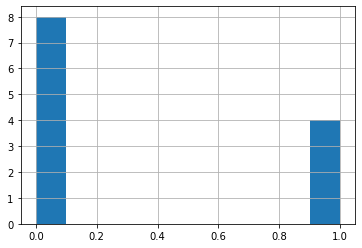

In [21]:
df.single_sample.hist();

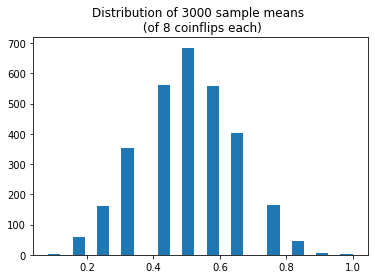

In [23]:
ax = plt.hist(sample_means, bins=25)
plt.title('Distribution of 3000 sample means \n (of 8 coinflips each)');

First graph is a single sample (binomial distribution) second is the means of all samples plotted (normal distribution) 

In [26]:
coinflips = np.random.binomial(n=1, p=.5, size=12)

print(np.mean(coinflips))

0.25


In [25]:
coinflips = np.random.binomial(n=1, p=.5, size=12)

print(np.mean(coinflips))

0.5833333333333334


In [27]:
coinflips = np.random.binomial(n=1, p=.5, size=120)

print(np.mean(coinflips))

0.525


In [28]:
coinflips = np.random.binomial(n=1, p=.5, size=120)

print(np.mean(coinflips))

0.5083333333333333


Here as my sample size increases, the "noise" is minimized by the law of large numbers. I get "closer" to the "true mean" or population mean. 

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

In [29]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  coinflips_small = np.random.binomial(n=1, p=.5, size=20)
  coinflips_large = np.random.binomial(n=1, p=.5, size=100)
  one_small_sample = coinflips_small
  one_small_large = coinflips_large
  sample_means_small.append(coinflips_small.mean())
  sample_means_large.append(coinflips_large.mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.7, 0.55, 0.3, 0.4, 0.4, 0.6, 0.55, 0.6, 0.55, 0.7, 0.5, 0.3, 0.4, 0.55, 0.5, 0.65, 0.4, 0.55, 0.65, 0.6, 0.4, 0.55, 0.45, 0.55, 0.5, 0.35, 0.4, 0.6, 0.8, 0.6, 0.4, 0.4, 0.55, 0.45, 0.3, 0.4, 0.7, 0.85, 0.55, 0.6, 0.55, 0.45, 0.35, 0.4, 0.75, 0.4, 0.55, 0.55, 0.6, 0.5, 0.5, 0.45, 0.45, 0.6, 0.3, 0.3, 0.6, 0.45, 0.45, 0.5, 0.5, 0.45, 0.55, 0.6, 0.55, 0.5, 0.55, 0.35, 0.5, 0.7, 0.65, 0.35, 0.6, 0.55, 0.45, 0.35, 0.45, 0.65, 0.6, 0.5, 0.5, 0.5, 0.5, 0.45, 0.6, 0.5, 0.45, 0.35, 0.6, 0.6, 0.55, 0.4, 0.55, 0.45, 0.6, 0.65, 0.35, 0.6, 0.55, 0.5, 0.55, 0.5, 0.65, 0.4, 0.6, 0.65, 0.5, 0.6, 0.45, 0.45, 0.55, 0.4, 0.55, 0.6, 0.5, 0.6, 0.45, 0.2, 0.35, 0.4, 0.65, 0.4, 0.4, 0.55, 0.55, 0.65, 0.4, 0.4, 0.6, 0.5, 0.35, 0.55, 0.6, 0.45, 0.55, 0.5, 0.45, 0.5, 0.9, 0.65, 0.65, 0.45, 0.45, 0.4, 0.4, 0.55, 0.55, 0.5, 0.35, 0.65, 0.5, 0.75, 0.4, 0.4, 0.25, 0.4, 0.4, 0.4, 0.45, 0.65, 0.65, 0.75, 0.3, 0.5, 0.5, 0.4, 0.55, 0.4, 0.3, 0.55, 0.55, 0.6, 0.45, 0.45, 0.4, 0.5, 0.6, 0.3, 0.65, 0.55, 0.45, 0.5

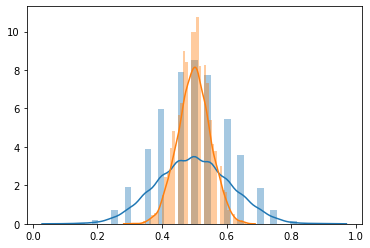

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

Standard error is the spread of the sample means distribution. (average amount that a sample mean will deviate from the true mean) 

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
from scipy import stats
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # stderr = stats.sem(data) # using scipy
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  # we want middle 95% confidence interval centered around mean so must use 
  # .975 as the right tail's cutoff and stats.t.ppf just takes in right side
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print("t statistic: ", t)
  moe = stderr * t
  return (mean, mean - moe, mean + moe)

In [31]:
coinflips_50 = np.random.binomial(n=1, p=.5, size=50)
coinflips_50

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0])

In [35]:
confidence_interval(coinflips_50)

t statistic:  2.009575234489209


(0.54, 0.3969189805959665, 0.6830810194040335)

confidence intervals:
- calculate percision
- expect to capture population mean within the bounds a certain % of the time 
- captures a certain % of the theoretical distribution of the population 

## Graphically Represent a Confidence Interval

t statistic:  2.009575234489209


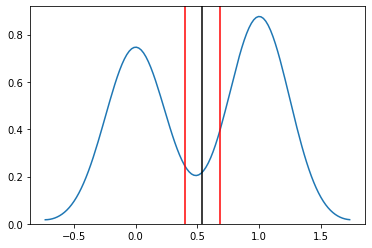

In [36]:
import seaborn as sns 

sns.kdeplot(coinflips_50)
CI = confidence_interval(coinflips_50)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [38]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.5666666666666667, 0.5666666666666667, 0.43333333333333335, 0.5333333333333333, 0.4, 0.6333333333333333, 0.5, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.6, 0.5666666666666667, 0.43333333333333335, 0.5666666666666667, 0.6, 0.4666666666666667, 0.43333333333333335, 0.5666666666666667, 0.5333333333333333, 0.6, 0.5333333333333333, 0.4666666666666667, 0.3, 0.5333333333333333, 0.6, 0.3333333333333333, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.36666666666666664, 0.7333333333333333, 0.5666666666666667, 0.5333333333333333, 0.4, 0.36666666666666664, 0.6333333333333333, 0.4, 0.6, 0.6333333333333333, 0.5333333333333333, 0.6666666666666666, 0.5666666666666667, 0.43333333333333335, 0.36666666666666664, 0.5, 0.3333333333333333, 0.5333333333333333, 0.4, 0.43333333333333335, 0.43333333333333335, 0.4666666666666667, 0.5333333333333333, 0.5, 0.36666666666666664, 0.43333333333333335, 0.36666666666666664, 0.5, 0.5333333333333333, 0.6, 0.5333333333333333, 0.7333333333

In [39]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.49167198015331853, 0.531661353180015)


In [40]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.49167198015331853, 0.531661353180015)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [42]:
ttest_1samp(coinflip_means, .531)

Ttest_1sampResult(statistic=-1.9185861055414979, pvalue=0.05791740579357288)

A null hypothesis that's just outside of our confidence interval == reject



In [43]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=2.9546854527684054, pvalue=0.003911134116212278)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

Chi-squared tests - tests independence or dependence on categorical variables.
Null hypothesis for chi squared test is always that the two categorical variables are independent of eachother. 

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [46]:
# I NEED CATEGORICAL VARIABLES TO DO A CHI^2 TEST

cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [47]:
crosstab = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)

crosstab

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [48]:
# (contingency table)
observed = pd.crosstab(df['sex'], df['hours_per_week_categories'])

observed

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+
sex,,,,,,
Female,235,671,1287,1914,5636,1028
Male,223,575,1105,1753,12700,5434


In [49]:
# Grab the crosstab cells that correspond to the females

femalecount = crosstab.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [50]:
# Grab the crosstab cells that correspond to the males

malecount = crosstab.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

In [53]:
# Make an expected value table

# Calculate row and column totals to use in the expected value calculations
row_sums = crosstab.iloc[0:2, 6].values
col_sums = crosstab.iloc[2, 0:6].values

# print(row_sums)
# print(col_sums)

# We can pull the sample size from the crosstab 
total = crosstab.loc['All','All']
total

# Or just grab it from the dataframe:
# df.shape[0]


# Now we have everything that we need to calculate our table of expected values
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)

# The shape of our table should match our contingency table
print(expected.shape)  
# The expected table here should match the table reported by scipy, or else
# we have made a mistake.
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [54]:
# our observed table comes from the contingency table (crosstab) 
# without the margins

observed = pd.crosstab(df['sex'], df['hours_per_week_categories']).values
print(observed.shape)
observed

# This table should have the same shape as the expected table.

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [58]:
# numpy array broadcasting allows us to write code that looks a lot like the 
# equation above.

# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")
# Our chi^2 statistic should match what was caculated by scipy -it does. 

Chi-Squared: 2287.190943926107


In [59]:
from scipy.stats.distributions import chi2

print("P-value from chi^2 statistic:", chi2.sf(chi_squared, 5))

P-value from chi^2 statistic: 0.0


## Run a $\chi^{2}$ Test using Scipy

In [56]:
# Do the same chi^2 test with Scipy
# I pass the function my contingency table (crosstab without margins)
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)


print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 2287.190943926107
P-value: 0.0
Degrees of Freedom: 5
Expected: 
 [[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]
